In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


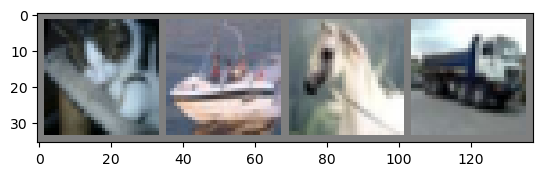

cat   ship  horse truck


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return x

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            nn.Conv2d(3,96, 3),
            nn.ReLU(),
            nn.Conv2d(96, 96, 3),
            nn.ReLU(),
            nn.Conv2d(96, 192, 3, 2),
            nn.ReLU(),
            nn.Conv2d(192, 192, 3),
            nn.ReLU(),
            nn.Conv2d(192, 192, 3),
            nn.ReLU(),
            nn.Conv2d(192, 192, 3, 2),
            nn.ReLU(),
            nn.Conv2d(192, 192, 3),
            nn.ReLU(),
            #PrintLayer(),
            nn.Conv2d(192, 192, 1),
            nn.ReLU(),
            nn.Conv2d(192, 10, 1),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Softmax(),
            #PrintLayer()
        )

    def forward(self, x):
        x = self.model(x)
        x = torch.squeeze(x)
        return x

In [5]:
model = CNN()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [7]:
def int_to_onehot(val, range):
    onehot = np.zeros(range)
    onehot[val] = 1
    return onehot

model(trainset[0][0])
print(int_to_onehot(trainset[29][1], 10))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.
/Users/Mikolaj/miniconda3/envs/EDS4AI/lib/python3.12/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [8]:
a = np.array([1, 3, 8, 2])
b = torch.from_numpy(a)
int_to_onehot(b, 10)

one_hot = torch.nn.functional.one_hot(b, num_classes=10)
print(one_hot)


tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])


In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print("labels: ")
        #print(labels)
        #print(inputs.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        #print(outputs.shape)
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10)
        one_hot_labels = one_hot_labels.float()
        #print(outputs.type())
        #print((one_hot_labels).type())
        print("outputs")
        print(outputs)
        print("labels")
        print(one_hot_labels)
        print("\n\n")
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


/Users/Mikolaj/miniconda3/envs/EDS4AI/lib/python3.12/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


outputs
tensor([[0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0993, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0993, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0992, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0993, 0.1007, 0.0984,
         0.0984]], grad_fn=<SqueezeBackward0>)
labels
tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])



outputs
tensor([[0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0993, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0992, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.0984, 0.0992, 0.1007, 0.0984,
         0.0984],
        [0.0984, 0.1053, 0.0984, 0.1041, 0.0984, 0.

KeyboardInterrupt: 

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for idx, data in enumerate(trainloader):
        recon = model(data)

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list of [Tensor, Tensor]!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list of [Tensor, Tensor]!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
